<a><img style="float: right;" src="https://i.ibb.co/1qVSNwH/FP.png" alt="FP" border="0"></a>

In [61]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

pd.options.display.float_format = '{:,.2f}'.format

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

In [62]:
import FutureAnalyser as fa

# Comparação entre Carteiras Index e Blackrocks

#### Fundos Blackrock

- BSF Managed Index Port Defesv A2 EUR - Fundo [de ETFs] misto conservador - [Banco Invest](https://www.bancoinvest.pt/poupanca-e-investimento/investimento/fundos-de-investimento/detalhe-fundo-de-investimento?isin=LU1241524617) // [Morningstar](https://www.morningstar.pt/pt/funds/snapshot/snapshot.aspx?id=F00000VYLS) // [site oficial](https://www.blackrock.com/pt/products/275521/bsf-managed-index-portfolio-defensive-class-a2rf-eur)
- BSF Managed Index Port Mod A2 EUR - Fundo [de ETFs] misto moderado - [Banco Invest](https://www.bancoinvest.pt/poupanca-e-investimento/investimento/fundos-de-investimento/detalhe-fundo-de-investimento?isin=LU1241524708) // [Morningstar](https://www.morningstar.pt/pt/funds/snapshot/snapshot.aspx?id=F00000VYLT) // [site oficial](https://www.blackrock.com/pt/products/275523/blackrock-managed-index-portfolio-moderate-a2rf-eur-fund)
- BSF Managed Index Port Growth A2 EUR - Fundo [de ETFs] misto dinâmico - [Banco Invest](https://www.bancoinvest.pt/poupanca-e-investimento/investimento/fundos-de-investimento/detalhe-fundo-de-investimento?isin=LU1241524880) // [Morningstar](https://www.morningstar.pt/pt/funds/snapshot/snapshot.aspx?id=F00000VYLU) // [site oficial](https://www.blackrock.com/americas-offshore/products/275522/blackrock-managed-index-portfolios-growth-fund)

ETFs/Index Funds

- IWDA - ETF tracker do MSCI World - [Morningstar](https://www.morningstar.pt/pt/etf/snapshot/snapshot.aspx?id=0P0000MLIH) //  [site oficial em português de versão comparável](https://www.blackrock.com/pt/products/251882/)
- IQQ0 - ETF tracker do MSCI World Minimum Volatility - [Morningstar](https://www.morningstar.pt/pt/etf/snapshot/snapshot.aspx?id=0P0000Y2A1) // [site oficial em português de versão comparável](https://www.blackrock.com/pt/products/251382/)
- Vanguard Global Bond Index Inv EURH Acc - Fundo índice tracker do Bloomberg Barclays Global Aggregate Bond Index- [Morningstar](IE00BGCZ0933) // [site oficial](https://global.vanguard.com/portal/site/kiids/pt/en/documents)// [KIID](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=10417) // [Factsheet](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=13309)

#### Carteiras ETFs

- Conservadora
    - 70% Vanguard Global Bond // 15% IWDA // 15% IQQ0
- Moderada
    - 50% Vanguard Global Bond // 25% IWDA // 25% IQQ0
- Dinâmica
    - 20% Vanguard Global Bond // 40% IWDA // 40% IQQ0

<!-- **Nota**: As carteiras de ETFs/Index Funds ainda **incluem** 1% anual de consultoria para investimento. -->

In [63]:
# Downloading funds and creating quotes and returns dataframes
ISINs = ['IE00BGCZ0933', 'IWDA', 'IQQ0', 'LU1241524617', 'LU1241524708', 'LU1241524880']
Nomes = ['VG_GB'       , 'IWDA', 'IQQ0', 'BR_Def'        , 'BR_Mod'        , 'BR_Grow']

fundos = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Carteiras_Clientes/Cotacoes_diarias_all.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()

In [64]:
#### Normalization to 100 ####
fundos = fa.compute_growth_rate(fundos)

In [65]:
Begin = fundos.head(1).index
Begin = str(Begin.strftime('%Y-%m-%d'))[8:18]

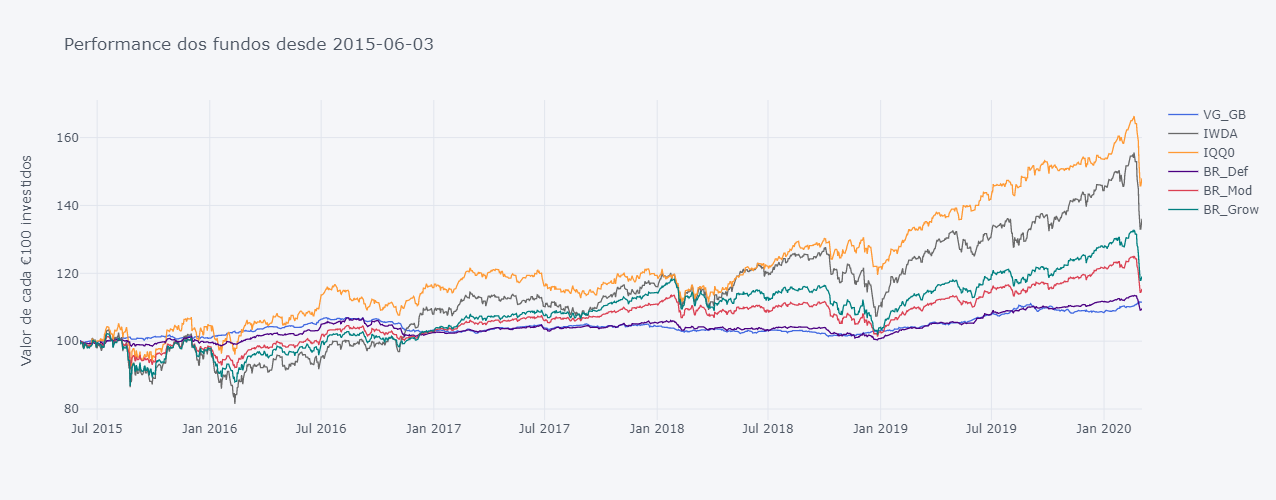

In [66]:
round(fundos, 2).iplot(dimensions=fa.dimensions, colors=fa.colors, title='Performance dos fundos desde ' + Begin, yTitle='Valor de cada €100 investidos' )

**Dica:** A interactividade dos gráficos da plotly permite:

    . Zoom (mantenham o clique e arrastem o cursor em simultâneo, em cima do gráfico);
    . Tem uma lista de opções que aparece se forem com o cursor ao canto superior direito;
    . Façam duplo clique no gráfico ou seleccionem a opção Autoscale/Reset Axes para voltar ao normal;
    . Alterem a opção de 'Compare data on hoover' para 'Show closest data on hoover' se vos for mais conveniente;
    . Se clicarem num nome na legenda esse fundo desaparece (clicando de novo ele volta a apetecer).

In [67]:
Portfolios = fa.compute_portfolio(fundos, [0.7, 0.15, 0.15, 0, 0, 0], Nomes=Nomes)
Portfolios.columns = ['Cons.']

Portfolios['Mod.'] = fa.compute_portfolio(fundos, [0.50, 0.25, 0.25, 0, 0, 0], Nomes=Nomes)
Portfolios['Din.'] = fa.compute_portfolio(fundos, [0.20, 0.40, 0.40, 0, 0, 0], Nomes=Nomes)

Portfolios['BR_Def']  = fundos['BR_Def'].copy()
Portfolios['BR_Mod']  = fundos['BR_Mod'].copy()
Portfolios['BR_Grow'] = fundos['BR_Grow'].copy()

In [68]:
Portfolios = Portfolios[['BR_Def', 'Cons.', 'BR_Mod', 'Mod.', 'BR_Grow', 'Din.']]

In [69]:
# Fronteira eficiente

In [70]:
# Downloading funds and creating quotes and returns dataframes
ISINs = ['IE00BGCZ0933', 'IWDA', 'IQQ0']
Nomes = ['VG_GB'       , 'IWDA', 'IQQ0']

fundos = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Carteiras_Clientes/Cotacoes_diarias_all.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()

In [71]:
# end_return = fa.compute_return(fundos)
# total_return = end_return @ weights
# total_return = round(total_return, 2)
# print(total_return)
# print(round(((1 + (total_return / 100))** (1/years) - 1) * 100, 2))

# multi_dot([weights, cov_matrix, weights.T])

In [72]:
# from numpy.linalg import multi_dot

# # Calculate Years of investment
# years = len(pd.date_range(fundos.index[0], fundos.index[-1], freq='D')) / 365

# def compute_fast_monte_carlo(dataframe, iterations_in_thousands=10):
    
#     np.random.seed(0)
    
#     # Standard Deviations
#     desvios_padroes_all = []
#     returns_matrix = []
#     weights_fmc = []
#     weights_fmc2 = []
    
#     end_return = fa.compute_return(dataframe)

#     cov_matrix = dataframe.pct_change().cov()

#     for i in range(0, iterations_in_thousands):
#         weights_rw = np.random.rand(1000, dataframe.shape[1])
#         weights_rw = np.array(weights_rw / np.matrix(weights_rw.sum(axis=1)).T)
#         weights_fmc = np.append(weights_fmc, weights_rw)
#         desvios_padroes = np.diagonal((multi_dot([weights_rw, cov_matrix, weights_rw.T])))
#         desvios_padroes_all = np.append(desvios_padroes_all, desvios_padroes)
#         returns = np.dot((end_return), np.transpose(weights_rw))
#         returns_matrix = np.append(returns_matrix, returns)

#     returns_matrix = returns_matrix / 100
#     returns_matrix = ((((returns_matrix + 1))) ** (1 / years) - 1) * 100
#     desvios_padroes_all = np.sqrt(np.array(desvios_padroes_all)) * (np.sqrt(252)) * 100
#     sharpe_matrix = np.divide(returns_matrix, desvios_padroes_all)
#     weights_fmc2  = np.array_split(weights_fmc, len(sharpe_matrix))

#     fast_monte_carlo = pd.DataFrame({
#                                     'Retornos': returns_matrix,
#                                     'StdDev':desvios_padroes_all,
#                                     'Sharpe': sharpe_matrix,
#                                     'Pesos': weights_fmc2
#                                     })
#     return fast_monte_carlo

In [73]:
# fast_monte_carlo = compute_fast_monte_carlo(fundos, 500)

In [74]:
# # Ploting on a graph
# plt.figure(figsize=(12, 6.8))
# plt.scatter(x = fast_monte_carlo['StdDev'], y = fast_monte_carlo['Retornos'], c = fast_monte_carlo['Sharpe'],  cmap = 'viridis_r', s = 1)
# plt.colorbar(label='Racio de Sharpe')
# plt.ylabel("Retorno")
# plt.xlabel("Volatilidade")
# plt.title('Simulação de Monte Carlo com 500 mil iterações para as carteiras Index')
# plt.show()

In [75]:
# portfolios_df = pd.DataFrame()
#
# for i in np.linspace(fast_monte_carlo['Retornos'].min(), fast_monte_carlo['Retornos'].max(), 500):
#     portfolio = fast_monte_carlo.loc[round(fast_monte_carlo['Retornos'], 2) == round(i, 2)]
#     portfolio = portfolio.loc[round(portfolio['StdDev'], 3) == round(portfolio['StdDev'].min(), 3)]
#     portfolio = portfolio
#     portfolios_df = portfolios_df.append([portfolio])
#     portfolios_df = portfolios_df
#
# portfolios_df['Pesos_r'] = [[(i * 100) for i in nested] for nested in portfolios_df['Pesos']] 
# portfolios_df['Pesos_r'] = [[np.round(float(i), 2) for i in nested] for nested in portfolios_df['Pesos_r']]

In [76]:
# # Create a trace
# trace = go.Scatter(
#             x = portfolios_df['StdDev'],
#             y = portfolios_df['Retornos'],
#             mode = 'markers',
#             customdata = portfolios_df['Pesos_r'],
#             text = portfolios_df['Sharpe'],
#             name = 'F.E.',
#             marker=dict(color = portfolios_df['Sharpe'],
#                     colorscale='Viridis',
#                     reversescale=True,
#                     showscale=False),
#             hovertemplate = '<i>Return</i>: %{y:.2f}'
#                     '<br><i>Volatility</i>: %{x:.2f}<br>'
#                     '<i>Sharpe</i>: %{text:.3f}<br>'
#                     '<br><i>Pesos:</i> %{customdata}',


# )


# ## Cons
# Cons_CAGR = float(fa.compute_performance_table(Portfolios).iloc[1][1].replace('%', ''))
# Cons_StdDev = float(fa.compute_performance_table(Portfolios).iloc[1][2].replace('%', ''))

# trace1 = go.Scatter(
#     y = (Cons_CAGR, Cons_CAGR),
#     x = (Cons_StdDev, Cons_StdDev),
#     hovertemplate = '<i>Return</i>: %{y:.2f}'
#                     '<br><i>Volatility</i>: %{x:.2f}<br>',
#     name = 'Cons.',
#     mode = 'markers',
#     marker = dict(
#         size = 10,
#         color = 'dimgrey',
#     )
# )

# ## Mod
# Mod_CAGR = float(fa.compute_performance_table(Portfolios).iloc[3][1].replace('%', ''))
# Mod_StdDev = float(fa.compute_performance_table(Portfolios).iloc[3][2].replace('%', ''))

# trace2 = go.Scatter(
#     y = (Mod_CAGR, Mod_CAGR),
#     x = (Mod_StdDev, Mod_StdDev),
#     hovertemplate = '<i>Return</i>: %{y:.2f}'
#                     '<br><i>Volatility</i>: %{x:.2f}<br>',
#     name = 'Mod.',
#     mode = 'markers',
#     marker = dict(
#         size = 10,
#         color = 'royalblue',
#     )
# )

# ## Din
# Din_CAGR = float(fa.compute_performance_table(Portfolios).iloc[5][1].replace('%', ''))
# Din_StdDev = float(fa.compute_performance_table(Portfolios).iloc[5][2].replace('%', ''))
# Din_Sharpe = float(fa.compute_performance_table(Portfolios).iloc[5][3])

# trace3 = go.Scatter(
#     y = (Din_CAGR, Din_CAGR),
#     x = (Din_StdDev, Din_StdDev),
#     customdata = np.array(Din_Sharpe),
#     hovertemplate = '<i>Return</i>: %{y:.2f}'
#                     '<br><i>Volatility</i>: %{x:.2f}<br>',
#     name = 'Din.',
#     mode = 'markers',
#     marker = dict(
#         size = 10,
#         color = 'indigo',
#     )
# )

# layout = go.Layout(
#     plot_bgcolor='#f5f5f5',
#     paper_bgcolor='#f5f5f5',
#     width=700,
#     height=700,
#     title='Fronteira Eficiente Interactiva',
#     hovermode = 'closest'
#     )
    
# data = [trace, trace1, trace2, trace3]
    
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

In [77]:
fa.compute_performance_table(Portfolios)

,Return,CAGR,StdDev,Sharpe,Max DD,MAR
BR_Def,9.57%,1.94%,2.71%,0.72,-6.12%,0.32
Cons.,20.63%,4.02%,3.44%,1.17,-4.01%,1.00
BR_Mod,15.38%,3.05%,6.21%,0.49,-10.73%,0.28
Mod.,26.75%,5.11%,5.47%,0.93,-7.14%,0.72
BR_Grow,19.07%,3.74%,9.16%,0.41,-15.03%,0.25
Din.,35.98%,6.68%,8.78%,0.76,-12.10%,0.55


In [78]:
# #### Returns ####
# returns = (fundos / fundos.shift(1)) - 1

# #### Normalization to 100 #####
# fundos_norm = (fundos / fundos.iloc[0] * 100)

# # Calculate Years of investment
# years = len(pd.date_range(fundos_norm.index[0], fundos_norm.index[-1], freq='D')) / 365

# #### Setting seed for pseudo random number generator ###
# np.random.seed(0)

# #### Markowitz's Efficient Frontier ####
# cov_matrix = returns.cov() * 252
# corr_matrix = returns.corr()

# num_assets = len(fundos.columns)

# pfolio_returns = []
# pfolio_volatilities = []
# pfolio_weights = []
# nportfolios = 100000

# def simulation(n):
#     for x in range (nportfolios):
#             weights = np.random.random(num_assets)
#             weights /= np.sum(weights)
#             portfolio = np.dot(fundos_norm, weights)                                
#             pfolio_weights.append(weights)
#             pfolio_returns.append((((portfolio[-1] / portfolio[0]) ** (1 / years)) -1) * 100)
#             pfolio_volatilities.append((np.std(np.diff(portfolio) / portfolio[:-1] * 100)) * (np.sqrt(252)))

# simulation(nportfolios)
                
# pfolio_returns = np.array(pfolio_returns)
# pfolio_volatilities = np.array(pfolio_volatilities)

# # Making a dataframe with the values
# portfolios = pd.DataFrame({"Return": pfolio_returns,
#                            "Volatility": pfolio_volatilities})

# #### Adding Sharpe and weights to portfolios dataframe ####
# portfolios["Sharpe"] = portfolios["Return"] / portfolios["Volatility"]
# portfolios["Weights"] = pfolio_weights
# Sharpe_array = np.array(portfolios['Sharpe'])

In [79]:
# # Ploting on a graph
# plt.figure(figsize=(12, 6.8))
# plt.scatter(x = portfolios["Volatility"], y = portfolios["Return"], c = Sharpe_array,  cmap = 'viridis_r', s = 1)
# plt.colorbar(label='Racio de Sharpe')
# plt.ylabel("Retorno")
# plt.xlabel("Volatilidade")
# plt.title('Simulação de Monte Carlo com ' + str(len(portfolios) // 1000) + ' mil portfolios com pesos aleatórios')
# plt.show()

In [80]:
# from scipy.optimize import minimize

# def portfolio_return(weights, returns):
#     '''
#     Weights -> Returns
#     '''
#     return weights.T @ returns

# def portfolio_vol(weights, covmat):
#     '''
#     Weights -> Vol
#     '''
#     return (weights.T @ covmat @ weights)

# def minimize_vol(target_return, er, cov):
#     """
#     Returns the optimal weights that achieve the target return
#     given a set of expected returns and a covariance matrix
#     """
#     n = er.shape[0]
#     init_guess = np.repeat(1/n, n)
#     bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
#     # construct the constraints
#     weights_sum_to_1 = {'type': 'eq',
#                         'fun': lambda weights: np.sum(weights) - 1
#     }
#     return_is_target = {'type': 'eq',
#                         'args': (er,),
#                         'fun': lambda weights, er: target_return - portfolio_return(weights,er)
#     }
#     weights = minimize(portfolio_vol, init_guess,
#                        args=(cov,), method='SLSQP',
#                        options={'disp': False},
#                        constraints=(weights_sum_to_1,return_is_target),
#                        bounds=bounds)
#     return weights.x

# def optimal_weights(n_points, er, cov):
#     '''
#     -> list of weights to run the optimizer on to minimize the vol
#     '''
#     target_rs = np.linspace(er.min(), er.max(), n_points)
#     weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
#     return weights
    
# def plot_ef(n_points, er, cov, style='.-'):
#     """
#     Plots the multi-asset efficient frontier
#     """
#     weights = optimal_weights(n_points, er, cov)
#     rets = [portfolio_return(w, er) for w in weights]
#     vols = [portfolio_vol(w, cov) for w in weights]
#     ef = pd.DataFrame({
#         "Returns": rets, 
#         "Volatility": vols,
#         'Weights': weights,
#     })
#     ef['Returns'] = (((((ef['Returns'] / 100) + 1))) ** (1 / years) - 1) * 100
#     ef['Volatility'] =  (np.sqrt(ef['Volatility']) * 100)
#     ef['Sharpe'] = ef['Returns'] / ef['Volatility']
    
#     return ef

In [81]:
# ef = plot_ef(200, end_return, cov_matrix);

In [82]:
# # Create a trace
# trace = go.Scatter(
#     hovertemplate = '<i>Return</i>: %{y:.2f}'
#                 '<br><i>Volatility</i>: %{x:.2f}<br>',
# #                 '<br><i>Sharpe</i>: %{text:.2f}<br>',
# #                 '<br><i>Volatility</i>: %{text:}<br>',
# #                 '<br><i>Fin:</i> %{customdata:.2%}',
# #     x = ef['Volatility'],
#     y = ef['Returns'],
#     mode = 'markers',
# #     customdata = ef['Sharpe'],
#     text = ef['Sharpe'],
#     name = 'Fronteira eficiente',
#     marker=dict(color = ef['Sharpe'],
#             colorscale='Viridis',
#             reversescale=True,
#             showscale=True),


# )


# layout = go.Layout(
#     plot_bgcolor='#f5f5f5',
#     paper_bgcolor='#f5f5f5',
#     width=700,
#     height=700,
#     )
    
# data = [trace]
    
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

In [83]:
def compute_costs(DataFrame, percentage, sessions_per_year=365, Nome='Price'):
    DataFrame = pd.DataFrame(DataFrame.copy())
    DataFrame['Custos'] = (percentage/sessions_per_year) / 100
    DataFrame['Custos_shifted'] = DataFrame['Custos'].shift(1)
    DataFrame['Custos_acumulados'] = DataFrame['Custos_shifted'].cumsum()
    DataFrame[Nome] = DataFrame.iloc[ : ,0] * (1-DataFrame['Custos_acumulados'])
    DataFrame = DataFrame[[Nome]]
    DataFrame = DataFrame.fillna(100)
    return DataFrame

In [84]:
pd.options.display.float_format = '{:,.2f}€'.format

fundo_com_custo = Portfolios['Cons.'].copy()
Portfolios['Cons.'] = compute_costs(Portfolios['Cons.'], percentage=0)
Portfolios['Mod.']  = compute_costs(Portfolios['Mod.'], percentage=0)
Portfolios['Din.']  = compute_costs(Portfolios['Din.'], percentage=0)

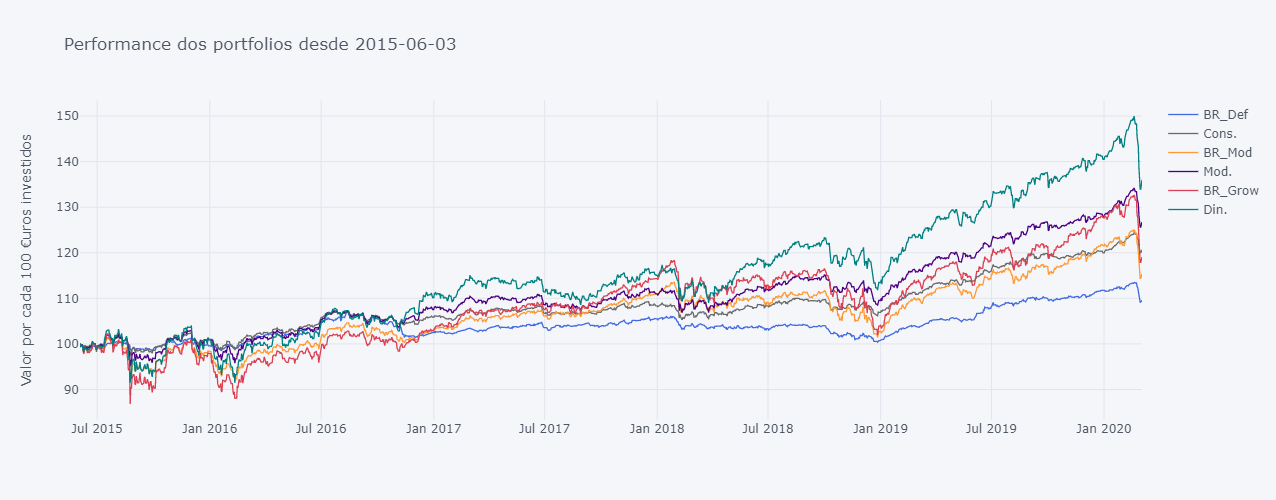

In [85]:
round(Portfolios, 2).iplot(dimensions=fa.dimensions, colors=fa.colors, title='Performance dos portfolios desde ' + Begin, yTitle='Valor por cada 100 €uros investidos')

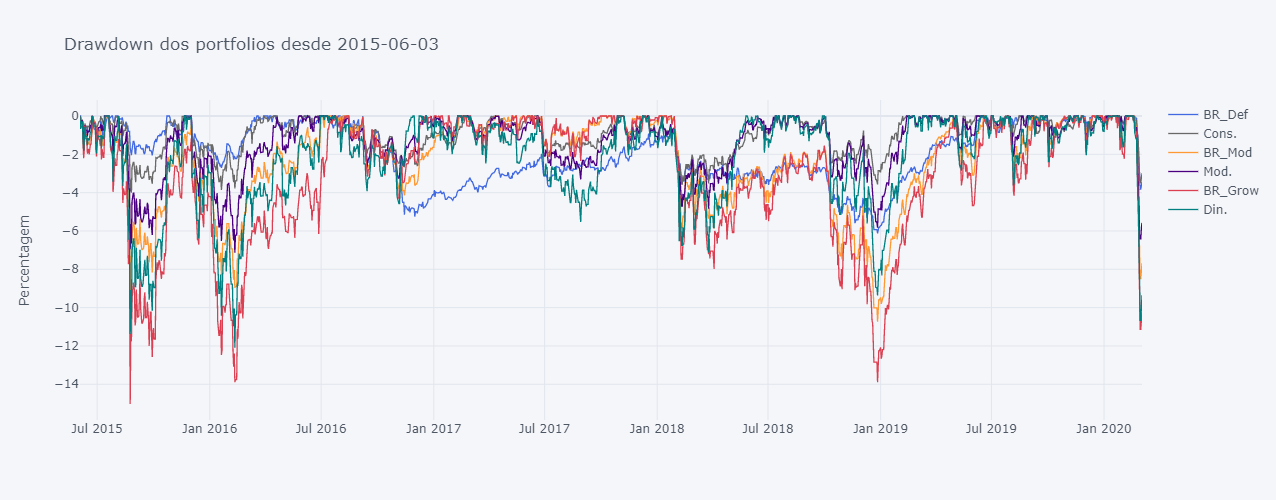

In [86]:
DD = fa.compute_drawdowns(Portfolios)

round(DD, 2).iplot(dimensions=fa.dimensions, colors=fa.colors, title='Drawdown dos portfolios desde ' + Begin, yTitle='Percentagem')

In [87]:
fa.print_title('Drawdown actual (' + str(Portfolios.index[-1])[0:10] + ')')
DD = fa.compute_drawdowns(Portfolios)
DD = DD /100
round(DD.tail(1), 5).applymap(lambda x: "{0:.2f}%".format(x*100))

**Drawdown actual (2020-03-03)**

,BR_Def,Cons.,BR_Mod,Mod.,BR_Grow,Din.
2020-03-03,-3.45%,-2.99%,-7.69%,-5.58%,-10.24%,-9.35%


In [88]:
pd.options.display.float_format = '{:,.2f}'.format
fa.print_title('Performance dos Portfolios desde ' + Begin)
fa.compute_performance_table(Portfolios)

**Performance dos Portfolios desde 2015-06-03**

,Return,CAGR,StdDev,Sharpe,Max DD,MAR
BR_Def,9.57%,1.94%,2.71%,0.72,-6.12%,0.32
Cons.,20.63%,4.02%,3.44%,1.17,-4.01%,1.00
BR_Mod,15.38%,3.05%,6.21%,0.49,-10.73%,0.28
Mod.,26.75%,5.11%,5.47%,0.93,-7.14%,0.72
BR_Grow,19.07%,3.74%,9.16%,0.41,-15.03%,0.25
Din.,35.98%,6.68%,8.78%,0.76,-12.10%,0.55


In [89]:
fa.print_title('Performance a 12 meses')
fundos_1 = fa.filter_by_date(Portfolios, years=1)
fa.compute_performance_table(fundos_1)

**Performance a 12 meses**

,Return,CAGR,StdDev,Sharpe,Max DD,MAR
BR_Def,5.59%,5.56%,2.73%,2.03,-3.81%,1.46
Cons.,8.80%,8.75%,3.00%,2.92,-3.48%,2.51
BR_Mod,5.05%,5.03%,5.91%,0.85,-8.48%,0.59
Mod.,9.47%,9.41%,4.75%,1.98,-6.41%,1.47
BR_Grow,4.74%,4.71%,7.98%,0.59,-11.13%,0.42
Din.,10.19%,10.13%,7.60%,1.33,-10.67%,0.95


In [90]:
fa.print_title('Performance a 3 anos')
fundos_3 = fa.filter_by_date(Portfolios, years=3)
fa.compute_performance_table(fundos_3)

**Performance a 3 anos**

,Return,CAGR,StdDev,Sharpe,Max DD,MAR
BR_Def,6.13%,2.00%,2.52%,0.79,-5.40%,0.37
Cons.,12.52%,4.00%,3.07%,1.30,-3.57%,1.12
BR_Mod,9.10%,2.94%,5.56%,0.53,-10.73%,0.27
Mod.,15.16%,4.81%,4.71%,1.02,-6.41%,0.75
BR_Grow,10.95%,3.52%,7.61%,0.46,-13.89%,0.25
Din.,18.87%,5.92%,7.37%,0.80,-10.67%,0.55


In [91]:
fa.print_title('Performance a 5 anos')
fundos_5 = fa.filter_by_date(Portfolios, years=5)
fa.compute_performance_table(fundos_5)

**Performance a 5 anos**

,Return,CAGR,StdDev,Sharpe,Max DD,MAR
BR_Def,9.57%,1.94%,2.71%,0.72,-6.12%,0.32
Cons.,20.63%,4.02%,3.44%,1.17,-4.01%,1.00
BR_Mod,15.38%,3.05%,6.21%,0.49,-10.73%,0.28
Mod.,26.75%,5.11%,5.47%,0.93,-7.14%,0.72
BR_Grow,19.07%,3.74%,9.16%,0.41,-15.03%,0.25
Din.,35.98%,6.68%,8.78%,0.76,-12.10%,0.55


- **CAGR:** Retorno geométrico anualizado do portfolio;
- **StdDev:** Desvio padrão anualizado do portfolio (quanto mais alto mais risco tem a carteira);
- **Sharpe:** CAGR/StdDev (quanto mais alto melhor);
- **Max DD:** Maior queda do portfolio;
- **MAR:** CAGR/Max DD (quanto mais alto melhor).

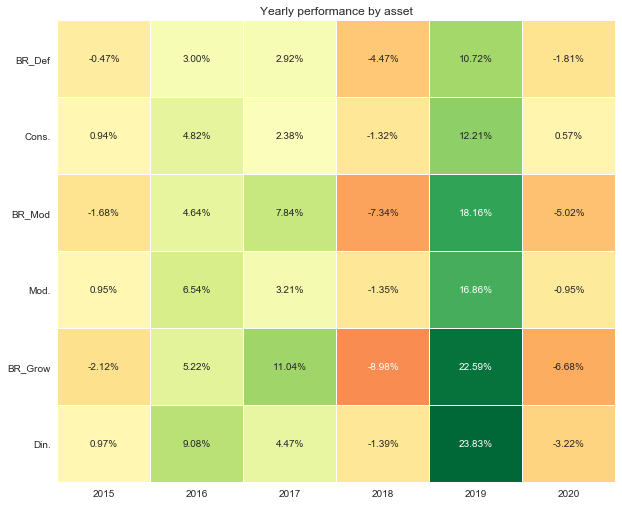

In [92]:
fundos_norm = Portfolios.copy()

# Resampling to yearly (business year)
yearly_quotes_fundos = fundos_norm.resample('BA').last()

# Adding first quote (only if start is in the middle of the year) ### Falta trabalho para automatizar #####
yearly_quotes_fundos = pd.concat([yearly_quotes_fundos.iloc[:1], yearly_quotes_fundos])
yearly_quotes_fundos = pd.concat([pd.DataFrame(fundos_norm.iloc[0]).transpose(), yearly_quotes_fundos.iloc[1:]])

# Returns
yearly_returns_fundos = ((yearly_quotes_fundos / yearly_quotes_fundos.shift(1)) - 1) * 100
yearly_returns_fundos = yearly_returns_fundos.set_index([list(range(fundos_norm.index[0].year - 1, fundos_norm.index[-1].year + 1))]).drop(fundos_norm.index[0].year - 1)

# Calcular em valores percentuais
yearly_returns_fundos = yearly_returns_fundos / 100

# Sns heatmap
fig, ax = plt.subplots()
fig.set_size_inches(10,8.5)

ax = sns.heatmap(yearly_returns_fundos.transpose(), annot=True, cmap="RdYlGn", linewidths=.2, cbar=False, center=0.02, fmt='.2%')
plt.yticks(rotation=360)
plt.title('Yearly performance by asset')
plt.show()

In [93]:
print(fa.color.BOLD +'Nota:' + fa.color.END + ' Retornos de ' + str(Portfolios.index[0])[0:4] + ' começam em ' + Begin + '.')

Nota: Retornos de 2015 começam em 2015-06-03.


In [94]:
nr = 0
fa.print_title('Drawdown Table de ' + Portfolios.iloc[:, nr].name)
fa.compute_drawdowns_table(Portfolios.iloc[:, nr])

**Drawdown Table de BR_Def**

,Begin,End,Depth,Length
1,2016-09-07,2019-06-18,-6.12%,"2 Years, 9 Months, 11 Days"
2,2020-02-20,NaT,-3.81%,"0 Years, 0 Months, 13 Days"
3,2015-12-02,2016-03-17,-2.71%,"0 Years, 3 Months, 15 Days"
4,2015-08-04,2015-10-23,-2.05%,"0 Years, 2 Months, 19 Days"
5,2015-10-27,2015-11-20,-1.21%,"0 Years, 0 Months, 24 Days"


In [95]:
nr = 1
fa.print_title('Drawdown Table de ' + Portfolios.iloc[:, nr].name)
fa.compute_drawdowns_table(Portfolios.iloc[:, nr])

**Drawdown Table de Cons.**

,Begin,End,Depth,Length
1,2015-08-05,2015-11-19,-4.01%,"0 Years, 3 Months, 14 Days"
2,2015-12-02,2016-03-29,-3.86%,"0 Years, 3 Months, 27 Days"
3,2018-08-20,2019-02-05,-3.57%,"0 Years, 5 Months, 16 Days"
4,2017-12-18,2018-07-18,-3.55%,"0 Years, 7 Months, 0 Days"
5,2020-02-19,NaT,-3.48%,"0 Years, 0 Months, 14 Days"


In [96]:
nr = 2
fa.print_title('Drawdown Table de ' + Portfolios.iloc[:, nr].name)
fa.compute_drawdowns_table(Portfolios.iloc[:, nr])

**Drawdown Table de BR_Mod**

,Begin,End,Depth,Length
1,2018-01-24,2019-06-18,-10.73%,"1 Years, 4 Months, 25 Days"
2,2015-07-19,2016-07-01,-9.43%,"1 Years, -1 Months, 12 Days"
3,2020-02-19,NaT,-8.48%,"0 Years, 0 Months, 14 Days"
4,2016-08-15,2017-02-13,-4.15%,"0 Years, 5 Months, 29 Days"
5,2019-07-29,2019-09-05,-2.81%,"0 Years, 1 Months, 7 Days"


In [97]:
nr = 3
fa.print_title('Drawdown Table de ' + Portfolios.iloc[:, nr].name)
fa.compute_drawdowns_table(Portfolios.iloc[:, nr])

**Drawdown Table de Mod.**

,Begin,End,Depth,Length
1,2015-12-02,2016-05-26,-7.14%,"0 Years, 5 Months, 24 Days"
2,2015-08-05,2015-11-20,-6.95%,"0 Years, 3 Months, 15 Days"
3,2020-02-19,NaT,-6.41%,"0 Years, 0 Months, 14 Days"
4,2018-10-01,2019-02-13,-5.83%,"0 Years, 4 Months, 12 Days"
5,2018-01-09,2018-06-14,-4.84%,"0 Years, 5 Months, 5 Days"


In [98]:
nr = 4
fa.print_title('Drawdown Table de ' + Portfolios.iloc[:, nr].name)
fa.compute_drawdowns_table(Portfolios.iloc[:, nr])

**Drawdown Table de BR_Grow**

,Begin,End,Depth,Length
1,2015-07-19,2016-07-27,-15.03%,"1 Years, 0 Months, 8 Days"
2,2018-01-29,2019-06-20,-13.89%,"1 Years, 4 Months, 22 Days"
3,2020-02-19,NaT,-11.13%,"0 Years, 0 Months, 14 Days"
4,2016-08-15,2016-12-13,-4.29%,"0 Years, 3 Months, 28 Days"
5,2019-07-29,2019-09-12,-4.16%,"0 Years, 1 Months, 14 Days"


In [99]:
nr = 5
fa.print_title('Drawdown Table de ' + Portfolios.iloc[:, nr].name)
fa.compute_drawdowns_table(Portfolios.iloc[:, nr])

**Drawdown Table de Din.**

,Begin,End,Depth,Length
1,2015-12-02,2016-06-30,-12.1%,"0 Years, 6 Months, 28 Days"
2,2015-08-05,2015-11-20,-11.38%,"0 Years, 3 Months, 15 Days"
3,2020-02-19,NaT,-10.67%,"0 Years, 0 Months, 14 Days"
4,2018-10-01,2019-02-15,-9.36%,"0 Years, 4 Months, 14 Days"
5,2018-01-09,2018-05-25,-7.12%,"0 Years, 4 Months, 16 Days"


In [100]:
# Turning daily quotes into monthly
Portfolio_M = Portfolios.resample('BM').last()
# Monthly returns
Portfolio_ret_M = Portfolio_M.pct_change()

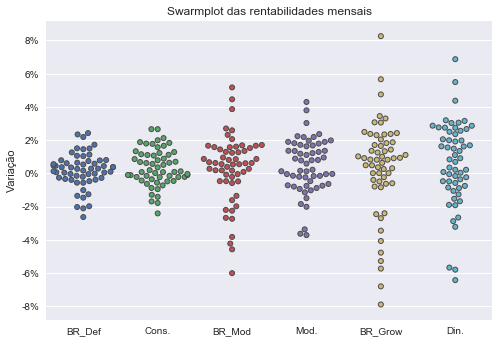

In [101]:
ax = sns.swarmplot(data=Portfolio_ret_M, orient='v', linewidth=1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax.set_title("Swarmplot das rentabilidades mensais")
ax.set_xlabel('')
ax.set_ylabel('Variação')
plt.show()

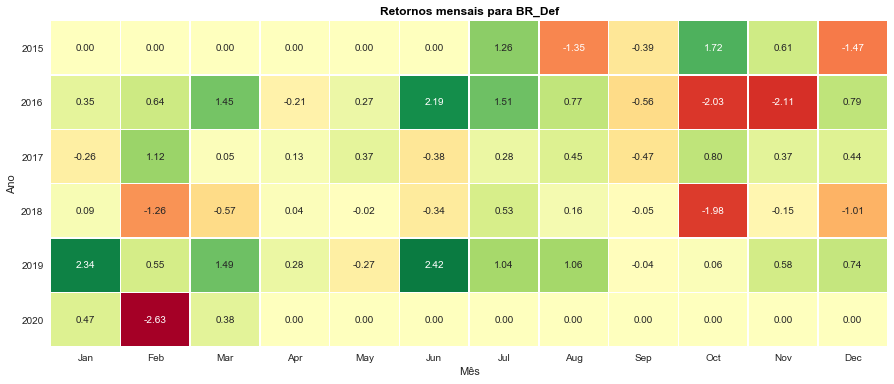

In [102]:
# Compute monthly returns table
nr = 0

fa.plot(Portfolios.iloc[:, nr], title= 'Retornos mensais para ' + Portfolios.iloc[:, nr].name , figsize=(15, 6))

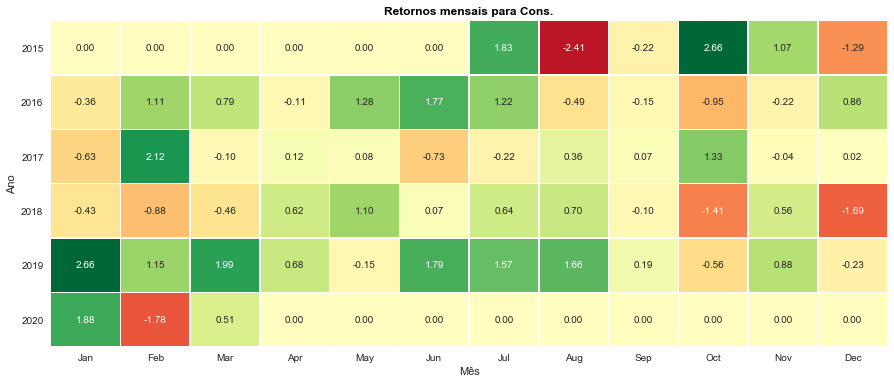

In [103]:
# Compute monthly returns table
nr = 1

fa.plot(Portfolios.iloc[:, nr], title= 'Retornos mensais para ' + Portfolios.iloc[:, nr].name , figsize=(15, 6))

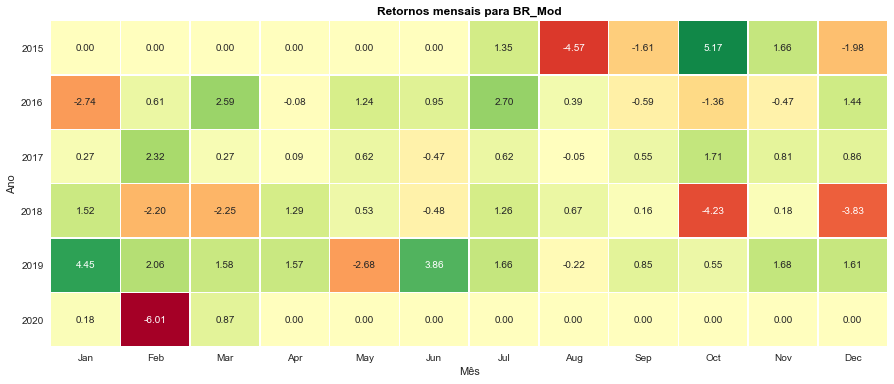

In [104]:
# Compute monthly returns table
nr = 2

fa.plot(Portfolios.iloc[:, nr], title= 'Retornos mensais para ' + Portfolios.iloc[:, nr].name , figsize=(15, 6))

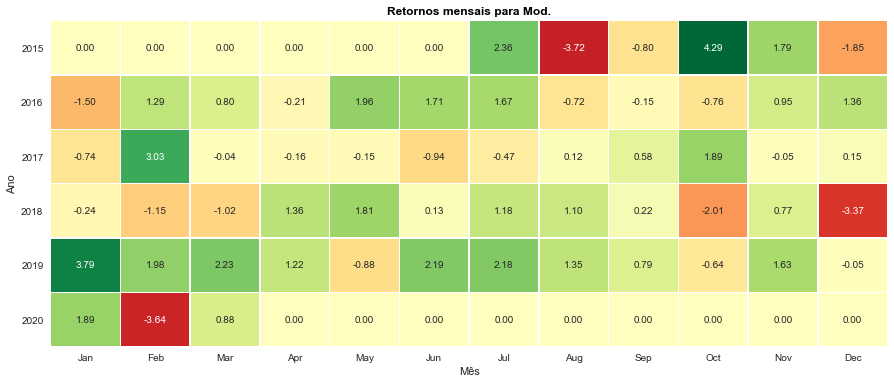

In [105]:
# Compute monthly returns table
nr = 3

fa.plot(Portfolios.iloc[:, nr], title= 'Retornos mensais para ' + Portfolios.iloc[:, nr].name , figsize=(15, 6))

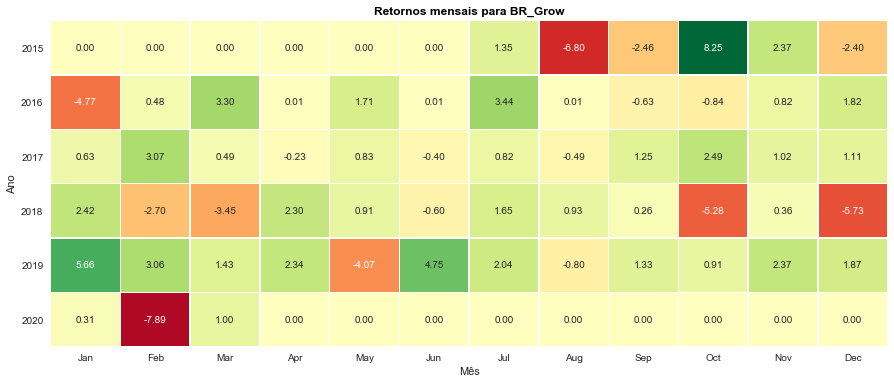

In [106]:
# Compute monthly returns table
nr = 4

fa.plot(Portfolios.iloc[:, nr], title= 'Retornos mensais para ' + Portfolios.iloc[:, nr].name , figsize=(15, 6))

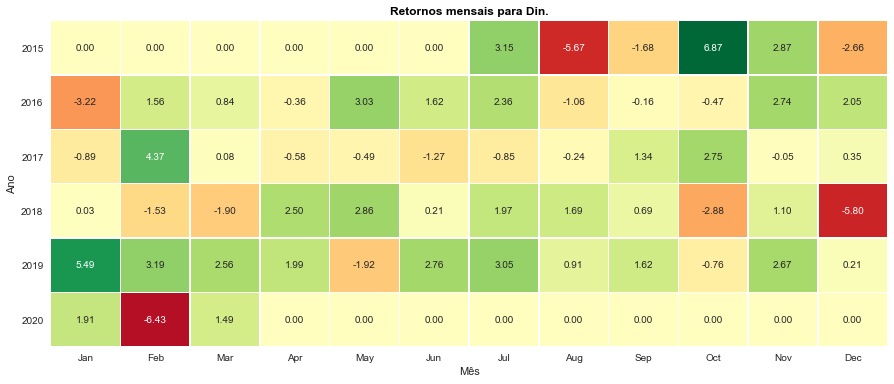

In [107]:
# Compute monthly returns table
nr = 5

fa.plot(Portfolios.iloc[:, nr], title= 'Retornos mensais para ' + Portfolios.iloc[:, nr].name , figsize=(15, 6))

In [108]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF

In [109]:
# import ipywidgets as widgets
# from IPython.display import display
# from IPython.display import HTML

In [110]:
# Interactivo

In [111]:
# # Downloading funds and creating quotes and returns dataframes
# ISINs = ['IE00BGCZ0933', 'IWDA', 'IQQ0']
# Nomes = ['VG_GB'       , 'IWDA', 'IQQ0']

# fundos = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Carteiras_Clientes/Cotacoes_diarias_all.csv', index_col = 'Date', parse_dates = True)[ISINs]

# fundos.columns = Nomes
# fundos = fundos.dropna()

In [112]:
# def compute_growth_rate(VG_GB=0.50, SC0J=0.25, IQQ0=0.25, ytop=131, ybottom=89, start='2015-03-06', end=today, percentage='0'):       
#     pesos = list([VG_GB, SC0J, IQQ0])
#     portfolio = fa.compute_portfolio(fundos[start:end], pesos, Nomes=Nomes)
    
#     layout = go.Layout(
#     title='Performance do portfolio desde ' + str(portfolio.index[0])[0:10] + ' até ' + str(portfolio.index[-1])[0:10],
#     plot_bgcolor='#f5f5f5',
#     paper_bgcolor='#f5f5f5',
#     width=990,
#     height=500,
#     xaxis=dict(
#         title='',
#         showgrid=True,
#         titlefont=dict(size=12),
#     ),
#     yaxis=dict(range=[ybottom, ytop])
#     )
#     percentage = float(percentage)
#     portfolio = compute_costs(portfolio, percentage=percentage, Nome='3Fundos')
#     fa.print_title('Tabela de performance desde ' + str(portfolio.index[0])[0:10])
#     display(HTML(fa.compute_ms_performance_table(portfolio).to_html()))
#     round(portfolio, 2).iplot(dimensions=fa.dimensions, colors=fa.colors, layout=layout)
#     DD = fa.compute_drawdowns(portfolio)
#     DD = round(DD /100, 5)
#     DD.iplot(dimensions=fa.dimensions, colors='darkorange', title='Performance do portfolio desde ' + str(portfolio.index[0])[0:10] + ' até ' + str(portfolio.index[-1])[0:10])
#     display(HTML('<br></br>'))

In [113]:
# a = widgets.interact_manual(compute_growth_rate,
#                             start=widgets.DatePicker(description='Start Date', disabled=False),
#                             end=widgets.DatePicker(description='End Date', disabled=False),
#                             VG_GB=(0, 1, .05), 
#                             SC0J=(0, 1, .05),
#                             IQQ0=(0, 1, .05),
#                             ytop=(86, 152, 5),
#                             ybottom=(4, 152, 5),
#                             percentage=widgets.Text(value='0'), 
#                             )

# display(a)